

## Feature engineering and linear regression
 

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

## Load in the melb_data_sold_train.csv file here
df = pd.read_csv('melb_data_sold_train.csv')

In [2]:
df1 = df.dropna(how='any').reset_index(drop=True)
df1

,Suburb,Address,Rooms,Type,Price,Date,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname
0,Abbotsford,25 Bloomburg St,2,h,1035000.0,4/02/2016,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan
1,Abbotsford,124 Yarra St,3,h,1876000.0,7/05/2016,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.80240,144.99930,Northern Metropolitan
2,Abbotsford,98 Charles St,2,h,1636000.0,8/10/2016,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.80600,144.99540,Northern Metropolitan
3,Abbotsford,10 Valiant St,2,h,1097000.0,8/10/2016,3067.0,3.0,1.0,2.0,220.0,75.0,1900.0,Yarra,-37.80100,144.99890,Northern Metropolitan
4,Abbotsford,123/56 Nicholson St,2,u,750000.0,12/11/2016,3067.0,2.0,2.0,1.0,0.0,94.0,2009.0,Yarra,-37.80780,144.99650,Northern Metropolitan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,Glenroy,69 Melbourne Av,3,h,680000.0,29/07/2017,3046.0,3.0,1.0,1.0,422.0,104.0,1960.0,Moreland,-37.70425,144.93164,Northern Metropolitan
3906,Greensborough,12 Yangoora Pl,4,h,900000.0,29/07/2017,3088.0,4.0,3.0,1.0,807.0,190.0,1975.0,Banyule,-37.70077,145.12743,Northern Metropolitan
3907,Highett,1/12 Jillian Av,3,t,1200000.0,29/07/2017,3190.0,3.0,1.0,2.0,269.0,125.0,2000.0,Bayside,-37.94775,145.02379,Southern Metropolitan
3908,Highett,31 The Crescent,4,t,1200000.0,29/07/2017,3190.0,4.0,2.0,2.0,304.0,183.0,2007.0,Kingston,-37.94633,145.04947,Southern Metropolitan


In [3]:
# Step 1 : Define the Haversine distance as a function
# assumes that pt1 and pt2 are 2x1 [lat,long] np arrays that contain locations of the 2 earth coordinates in deg
# using the Haversine formula found https://en.wikipedia.org/wiki/Haversine_formula
def haversine_distance(pt1,pt2):
    #code here, make sure pt1 and pt2 are passed in as degrees (lat,long) and convert to radians before calculation
    radius = 6371.0088
    lat1 = math.radians(pt1[0])
    long1 = math.radians(pt1[1])
    lat2 = math.radians(pt2[0])
    long2 = math.radians(pt2[1])
    difflat = lat2-lat1 
    difflong = long2-long1 
    
    a = math.sin(difflat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(difflong/2)**2
    c = 2 * math.asin(math.sqrt(a)) 
     
    return c * radius

In [4]:
# A quick check to see if we are getting the expected value
toorak_pt = np.array([-37.841820, 145.015986])
haversine_distance(toorak_pt,[-37.68178,144.73779])


30.244772513569124

In [5]:
# Step 2 : Add a new column to `df1` called 'distance_to_toorak' that uses the haversine_distance function 
# to calculate the distance to Toorak for every row in our dataframe. Save the new dataframe as `df2`
df2= df1.copy()
toorak = [-37.841820, 145.015986]
lt_list = df2["Lattitude"].tolist()
lg_list = df2["Longtitude"].tolist()
dis = []
for i in range(len(lt_list)):
    dis.append(haversine_distance([lt_list[i], lg_list[i]], toorak))
df2["distance_to_toorak"] = dis
df2

,Suburb,Address,Rooms,Type,Price,Date,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,distance_to_toorak
0,Abbotsford,25 Bloomburg St,2,h,1035000.0,4/02/2016,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4.261612
1,Abbotsford,124 Yarra St,3,h,1876000.0,7/05/2016,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.80240,144.99930,Northern Metropolitan,4.621843
2,Abbotsford,98 Charles St,2,h,1636000.0,8/10/2016,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.80600,144.99540,Northern Metropolitan,4.374206
3,Abbotsford,10 Valiant St,2,h,1097000.0,8/10/2016,3067.0,3.0,1.0,2.0,220.0,75.0,1900.0,Yarra,-37.80100,144.99890,Northern Metropolitan,4.780655
4,Abbotsford,123/56 Nicholson St,2,u,750000.0,12/11/2016,3067.0,2.0,2.0,1.0,0.0,94.0,2009.0,Yarra,-37.80780,144.99650,Northern Metropolitan,4.152012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,Glenroy,69 Melbourne Av,3,h,680000.0,29/07/2017,3046.0,3.0,1.0,1.0,422.0,104.0,1960.0,Moreland,-37.70425,144.93164,Northern Metropolitan,16.998846
3906,Greensborough,12 Yangoora Pl,4,h,900000.0,29/07/2017,3088.0,4.0,3.0,1.0,807.0,190.0,1975.0,Banyule,-37.70077,145.12743,Northern Metropolitan,18.491623
3907,Highett,1/12 Jillian Av,3,t,1200000.0,29/07/2017,3190.0,3.0,1.0,2.0,269.0,125.0,2000.0,Bayside,-37.94775,145.02379,Southern Metropolitan,11.798784
3908,Highett,31 The Crescent,4,t,1200000.0,29/07/2017,3190.0,4.0,2.0,2.0,304.0,183.0,2007.0,Kingston,-37.94633,145.04947,Southern Metropolitan,11.986684


## Create a one hot encoding for the categorical column 'Type'


In [6]:
type = pd.get_dummies(df2["Type"])
df3 = pd.concat([df2, type],1)
df3

,Suburb,Address,Rooms,Type,Price,Date,Postcode,Bedroom2,Bathroom,Car,...,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,distance_to_toorak,h,t,u
0,Abbotsford,25 Bloomburg St,2,h,1035000.0,4/02/2016,3067.0,2.0,1.0,0.0,...,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4.261612,1,0,0
1,Abbotsford,124 Yarra St,3,h,1876000.0,7/05/2016,3067.0,4.0,2.0,0.0,...,210.0,1910.0,Yarra,-37.80240,144.99930,Northern Metropolitan,4.621843,1,0,0
2,Abbotsford,98 Charles St,2,h,1636000.0,8/10/2016,3067.0,2.0,1.0,2.0,...,107.0,1890.0,Yarra,-37.80600,144.99540,Northern Metropolitan,4.374206,1,0,0
3,Abbotsford,10 Valiant St,2,h,1097000.0,8/10/2016,3067.0,3.0,1.0,2.0,...,75.0,1900.0,Yarra,-37.80100,144.99890,Northern Metropolitan,4.780655,1,0,0
4,Abbotsford,123/56 Nicholson St,2,u,750000.0,12/11/2016,3067.0,2.0,2.0,1.0,...,94.0,2009.0,Yarra,-37.80780,144.99650,Northern Metropolitan,4.152012,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,Glenroy,69 Melbourne Av,3,h,680000.0,29/07/2017,3046.0,3.0,1.0,1.0,...,104.0,1960.0,Moreland,-37.70425,144.93164,Northern Metropolitan,16.998846,1,0,0
3906,Greensborough,12 Yangoora Pl,4,h,900000.0,29/07/2017,3088.0,4.0,3.0,1.0,...,190.0,1975.0,Banyule,-37.70077,145.12743,Northern Metropolitan,18.491623,1,0,0
3907,Highett,1/12 Jillian Av,3,t,1200000.0,29/07/2017,3190.0,3.0,1.0,2.0,...,125.0,2000.0,Bayside,-37.94775,145.02379,Southern Metropolitan,11.798784,0,1,0
3908,Highett,31 The Crescent,4,t,1200000.0,29/07/2017,3190.0,4.0,2.0,2.0,...,183.0,2007.0,Kingston,-37.94633,145.04947,Southern Metropolitan,11.986684,0,1,0


##  Calculate the pairwise correlations between all of your numeric attributes


In [7]:
pearson = df3[["Rooms", "Price", "Postcode", "Bedroom2", "Bathroom","Car", "Landsize", "BuildingArea", "YearBuilt", "Lattitude", "Longtitude","distance_to_toorak", "h","t","u"]]
pearson.corr(method = "pearson")
#only continuous values

,Rooms,Price,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,distance_to_toorak,h,t,u
Rooms,1.000000,0.502814,0.054676,0.941684,0.593847,0.401716,0.085676,0.547816,-0.030447,0.012858,0.074846,0.232844,0.501128,-0.040762,-0.535102
Price,0.502814,1.000000,0.136468,0.480115,0.462985,0.223552,0.064029,0.465598,-0.330560,-0.224400,0.184597,-0.357013,0.391761,-0.095295,-0.372766
Postcode,0.054676,0.136468,1.000000,0.059311,0.122046,0.034698,0.014276,0.089355,0.035561,-0.445625,0.471934,0.008062,-0.040504,-0.008546,0.051754
Bedroom2,0.941684,0.480115,0.059311,1.000000,0.594920,0.403840,0.083237,0.532910,-0.010031,0.019970,0.076236,0.241515,0.484612,-0.037366,-0.518941
Bathroom,0.593847,0.462985,0.122046,0.594920,1.000000,0.322266,0.059483,0.470554,0.192470,-0.068643,0.109313,0.051662,0.181773,0.108148,-0.282390
Car,0.401716,0.223552,0.034698,0.403840,0.322266,1.000000,0.100686,0.299613,0.153313,-0.007839,0.032915,0.214759,0.214175,-0.006836,-0.236298
Landsize,0.085676,0.064029,0.014276,0.083237,0.059483,0.100686,1.000000,0.063136,0.028638,0.010734,0.013979,0.041420,0.047422,-0.067257,-0.005103
BuildingArea,0.547816,0.465598,0.089355,0.532910,0.470554,0.299613,0.063136,1.000000,0.024754,-0.047501,0.084074,0.076668,0.306231,-0.032396,-0.321614
YearBuilt,-0.030447,-0.330560,0.035561,-0.010031,0.192470,0.153313,0.028638,0.024754,1.000000,0.052205,0.023062,0.300236,-0.402670,0.331105,0.215689
Lattitude,0.012858,-0.224400,-0.445625,0.019970,-0.068643,-0.007839,0.010734,-0.047501,0.052205,1.000000,-0.366331,0.281684,0.121254,-0.028636,-0.115991


## Create a linear regression model to predict home values


In [8]:
# Step one, build the matrix X
linear = df3[["Rooms", "Postcode", "Bedroom2", "Bathroom","Car", "Landsize", "BuildingArea", "YearBuilt", "Lattitude", "Longtitude","distance_to_toorak", "h","t","u"]]
X = linear.values
X = np.insert(X,0,1,axis = 1)
X = pd.DataFrame(X)
# convert numpy array to Dataframe array

In [9]:
# Step two, build the column vector y
y = df3["Price"].values

In [10]:
# Step three, find beta hat per the formula (3.6) (you should use the library we used in class)
beta_hat = np.linalg.lstsq(X,y)
beta_hat = beta_hat[0]
beta_hat

<ipython-input-10-0a53adebc5fa>:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  beta_hat = np.linalg.lstsq(X,y)


array([ 8.68773594e+06,  1.37519623e+05,  6.35591132e+02,  2.57774471e+04,
        2.03540724e+05,  5.44025948e+04,  1.94402030e+01,  1.22151756e+03,
       -3.11155825e+03, -6.16718945e+05, -2.09209148e+05, -4.35776171e+04,
        3.07004856e+06,  2.88013220e+06,  2.73755518e+06])

In [11]:
# Test the model to see if we get something "reasonable" - i picked 23 at random 
np.matmul(X.iloc[23],beta_hat) 

668241.4294308759

In [12]:
# This is the actual price at this point
y[23]

805000.0

##  Apply the linear regression model to the test data and visualize the error


In [13]:
# Step zero, load the melb_data_sold_test.csv data for testing.  Use Imputation to fill in any missing numeric values
# We use imputation here instead of deletion since we want a prediction for _every_ row in the test file.
test = pd.read_csv("melb_data_sold_test.csv")
# load in data 
test["Rooms"] = test["Rooms"].fillna(df3["Rooms"].mean())
test["Postcode"] = test["Postcode"].fillna(df3["Postcode"].mean())
test["Bedroom2"] = test["Bedroom2"].fillna(df3["Bedroom2"].mean())
test["Bathroom"] = test["Bathroom"].fillna(df3["Bathroom"].mean())
test["Car"] = test["Car"].fillna(df3["Car"].mean())
test["Landsize"] = test["Landsize"].fillna(df3["Landsize"].mean())
test["BuildingArea"] = test["BuildingArea"].fillna(df3["BuildingArea"].mean())
test["YearBuilt"] = test["YearBuilt"].fillna(df3["YearBuilt"].mean())
test["Lattitude"] = test["Lattitude"].fillna(df3["Lattitude"].mean())
test["Longtitude"] = test["Longtitude"].fillna(df3["Longtitude"].mean())

test


,Suburb,Address,Rooms,Type,Price,Date,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname
0,Jacana,29 Fox Ct,3,h,620500.0,29/07/2017,3047.0,3.0,1.0,4.0,764.0,141.503239,1962.267008,Hume,-37.68907,144.91459,Northern Metropolitan
1,Keilor Park,45 Collinson St,3,h,750000.0,29/07/2017,3042.0,3.0,2.0,2.0,761.0,222.000000,1980.000000,Brimbank,-37.72224,144.85739,Western Metropolitan
2,Kensington,42 Gower St,3,h,1060000.0,29/07/2017,3031.0,3.0,1.0,0.0,190.0,141.503239,1962.267008,Melbourne,-37.79560,144.92779,Northern Metropolitan
3,Kew,6/385 Barkers Rd,3,t,1405000.0,29/07/2017,3101.0,3.0,2.0,2.0,325.0,129.000000,1980.000000,Boroondara,-37.81614,145.05056,Southern Metropolitan
4,Kew,11 Raheen Dr,4,h,3015000.0,29/07/2017,3101.0,4.0,2.0,2.0,813.0,276.000000,1970.000000,Boroondara,-37.80437,145.01725,Southern Metropolitan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,Wantirna South,15 Mara Cl,4,h,1330000.0,26/08/2017,3152.0,4.0,2.0,2.0,717.0,191.000000,1980.000000,NaN,-37.86887,145.22116,Eastern Metropolitan
1017,Werribee,5 Nuragi Ct,4,h,635000.0,26/08/2017,3030.0,4.0,2.0,1.0,662.0,172.000000,1980.000000,NaN,-37.89327,144.64789,Western Metropolitan
1018,Westmeadows,9 Black St,3,h,582000.0,26/08/2017,3049.0,3.0,2.0,2.0,256.0,141.503239,1962.267008,NaN,-37.67917,144.89390,Northern Metropolitan
1019,Wheelers Hill,12 Strada Cr,4,h,1245000.0,26/08/2017,3150.0,4.0,2.0,2.0,652.0,141.503239,1981.000000,NaN,-37.90562,145.16761,South-Eastern Metropolitan


In [14]:
# Step one, add the new attribute for the 'distance_to_toorak' and the one hot encoding to the new data frame
toorak = [-37.841820, 145.015986]
lt_list = test["Lattitude"].tolist()
lg_list = test["Longtitude"].tolist()
dis = []
for i in range(len(lt_list)):
    dis.append(haversine_distance([lt_list[i], lg_list[i]], toorak))
test["distance_to_toorak"] = dis
dums = pd.get_dummies(test["Type"])
test = pd.concat([test, dums],1)
test

,Suburb,Address,Rooms,Type,Price,Date,Postcode,Bedroom2,Bathroom,Car,...,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,distance_to_toorak,h,t,u
0,Jacana,29 Fox Ct,3,h,620500.0,29/07/2017,3047.0,3.0,1.0,4.0,...,141.503239,1962.267008,Hume,-37.68907,144.91459,Northern Metropolitan,19.181567,1,0,0
1,Keilor Park,45 Collinson St,3,h,750000.0,29/07/2017,3042.0,3.0,2.0,2.0,...,222.000000,1980.000000,Brimbank,-37.72224,144.85739,Western Metropolitan,19.263068,1,0,0
2,Kensington,42 Gower St,3,h,1060000.0,29/07/2017,3031.0,3.0,1.0,0.0,...,141.503239,1962.267008,Melbourne,-37.79560,144.92779,Northern Metropolitan,9.296810,1,0,0
3,Kew,6/385 Barkers Rd,3,t,1405000.0,29/07/2017,3101.0,3.0,2.0,2.0,...,129.000000,1980.000000,Boroondara,-37.81614,145.05056,Southern Metropolitan,4.168250,0,1,0
4,Kew,11 Raheen Dr,4,h,3015000.0,29/07/2017,3101.0,4.0,2.0,2.0,...,276.000000,1970.000000,Boroondara,-37.80437,145.01725,Southern Metropolitan,4.165735,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,Wantirna South,15 Mara Cl,4,h,1330000.0,26/08/2017,3152.0,4.0,2.0,2.0,...,191.000000,1980.000000,NaN,-37.86887,145.22116,Eastern Metropolitan,18.262739,1,0,0
1017,Werribee,5 Nuragi Ct,4,h,635000.0,26/08/2017,3030.0,4.0,2.0,1.0,...,172.000000,1980.000000,NaN,-37.89327,144.64789,Western Metropolitan,32.814349,1,0,0
1018,Westmeadows,9 Black St,3,h,582000.0,26/08/2017,3049.0,3.0,2.0,2.0,...,141.503239,1962.267008,NaN,-37.67917,144.89390,Northern Metropolitan,21.030518,1,0,0
1019,Wheelers Hill,12 Strada Cr,4,h,1245000.0,26/08/2017,3150.0,4.0,2.0,2.0,...,141.503239,1981.000000,NaN,-37.90562,145.16761,South-Eastern Metropolitan,15.081333,1,0,0


In [15]:
# Step two, build the attribute matrix Xdot 
v = test[["Rooms", "Postcode", "Bedroom2", "Bathroom","Car", "Landsize", "BuildingArea", "YearBuilt", "Lattitude", "Longtitude","distance_to_toorak", "h","t","u"]]
Xdot = v.values
Xdot = np.insert(Xdot,0,1,axis = 1)
Xdot

array([[1.000e+00, 3.000e+00, 3.047e+03, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 3.000e+00, 3.042e+03, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 3.000e+00, 3.031e+03, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [1.000e+00, 3.000e+00, 3.049e+03, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 4.000e+00, 3.150e+03, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 3.000e+00, 3.016e+03, ..., 1.000e+00, 0.000e+00,
        0.000e+00]])

In [16]:
# Step three, multiply Xdot by Beta hat. DO NOT USE A LOOP.  This is a vector of predicted prices
# called y_hat in the notes
y_hat = np.matmul(Xdot,beta_hat)
y_hat

array([ 777684.57131282,  941206.49431329, 1032437.7124131 , ...,
        781465.79730206, 1300011.76836247, 1294663.31070189])

In [17]:
# Step four, calculate the error vector, |actual price - predicted price|. We call this our "absolute error"
test["Predicted Prices"] = y_hat
test["Absolute Error"] = abs(test["Price"]- test["Predicted Prices"])
test["Absolute Error"]

0       1.571846e+05
1       1.912065e+05
2       2.756229e+04
3       6.299388e+04
4       1.099795e+06
            ...     
1016    1.363864e+05
1017    9.675236e+04
1018    1.994658e+05
1019    5.501177e+04
1020    1.246633e+05
Name: Absolute Error, Length: 1021, dtype: float64

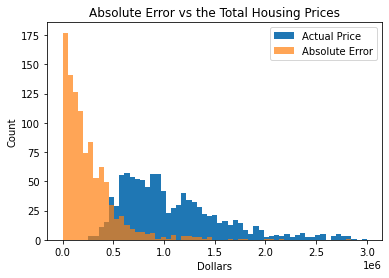

In [18]:
# Step five, create a histogram of the absolute error, and on the same plot create a histogram of the actual price.  
# You should use the "alpha" parameter to make the graph on top slightly translucent 
bins_list = np.linspace(0,3000000, 60)
plt.hist(test["Price"], label = "Actual Price", bins = bins_list)
plt.hist(test["Absolute Error"], label = "Absolute Error", bins = bins_list, alpha = 0.7)
plt.title("Absolute Error vs the Total Housing Prices")
plt.xlabel("Dollars")
plt.ylabel("Count")
plt.legend()